## 학과: IT 미디어 공학과
## 학번: 20171101
## 이름(영문이름): 박경선(gyeongseon park)

## <Step1. 탐색> : 데이터의 기초 정보 살펴보기

**[1.1] Chipotle 데이터셋의 기본 정보 출력하기**

- shape 속성, info()

In [1]:
# 로컬 디스크 데이터를 가져오기 위해 google.colab에서 files라는 package를 impor한다.
from google.colab import files

# files.upload()에 의해 [파일 선택] 버튼이 생성된다.
uploaded = files.upload()

Saving chipotle.tsv to chipotle.tsv


In [2]:
# pandas와 추가적으로 io 채키지가 필요하다.
import pandas as pd
import io

# read_csv()으로 업로드된 파일을 Byte단위로 읽어서 chipo 데이터프레임을 생성한다.
chipo = pd.read_csv(io.BytesIO(uploaded['chipotle.tsv']), sep='\t')

[참고] 주피터 노트북을 PC에 설치하여 사용할 경우 데이터를 불러오는 방법

In [37]:
import pandas as pd

file_path = '../data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep='\t')

In [39]:
# shape 속성은 데이터프레임의 행과 열의 크기를 제공한다.
print(chipo.shape)
print('----------------------------------------')
# info()는 데이터프레임의 행과 열의 구성정보를 제공한다.
print(chipo.info())
# print(chipo.head(20))

(4622, 5)
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   object 
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.7+ KB
None


**[1.2] chipotle 데이터셋의 행과 열, 데이터 확인하기**

- Head(), columns 속성, index 속성

In [6]:
# chipo 데이터프레임에서 상위 10개의 행을 보여준다.
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [7]:
# columns 속성은 컬럼에 대한 정보를 제공합나
print(chipo.columns)
print('----------------------------------------')
# index 속성은 행에 대한 인덱스 정보를 제공한다.
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
----------------------------------------
RangeIndex(start=0, stop=4622, step=1)


#### ✍️ Feature

**✔️ 수치형 피처**

describe()로 수치형 피처들의 기초 통계량 확인하기


**✔️ 범주형 피처**

unique()로 범주형 피처의 개수 출력하기 
  -> 몇 개의 범주가 있는지 확인하기



  ex. 주민번호로 성별을 구별한다 
  -> 숫자보다는 문자열을 가지고 분석하는 경우가 더 많음.

**[1.3] describe()로 수치형 피처들의 기초 통계량 확인하기**

- describe() 함수

In [8]:
# order_id(주문번호)는 숫자의 의미를 가지지 않기 때문에
# astype()을 이용하여 문자열(str)로 형변환한다.
chipo['order_id'] = chipo['order_id'].astype(str)

In [9]:
print(chipo.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


**[1.4] unique()로 범주형 피처의 개수 출력하기**
- unique() 함수

In [10]:
# order_id의 유일한 범주(category)의 개수를 출력합니다.
print(len(chipo['order_id'].unique()))

# item_name의 유일한 범주의 개수를 출력합니다.
print(len(chipo['item_name'].unique()))

1834
50


## <step2. 인사이트의 발견> 탐색과 시각화하기

**[2.1] 가장 많이 주문한 아이템 Top 10**
- value_counts() 함수

In [11]:
# value_counts()는 각 value가 몇 개 있는지를 반환한다.(값 별로 개수세기)
# ✍️ 내림차순으로 정렬된 것을 확인할 수 있음!
# [:10]은 0부터 9까지 10개를 의미한다.
item_count = chipo['item_name'].value_counts()[:10]
print(item_count)

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64


In [12]:
# [기초] enumerate(iterable 객체)는 인덱스와 원소를 반복적으로 열거하면서 반환한다.
# iterable 객체는 반복가능한 객체로써 리스트, 튜플, 시리즈 등이다.
for i, letter in enumerate(['A', 'B', 'C']):
  print(i, letter)

0 A
1 B
2 C


In [13]:
# [기초] start=1 옵션을 주면 인덱스가 1부터 시작한다.
for i, letter in enumerate(['A', 'B', 'C'], start=1):
  print(i, letter)

1 A
2 B
3 C


In [14]:
# 가장 많이 주문한 아이템 Top 10 구하기
# item_count.iteritems()는 item_count를 반복가능한 iterable객체로 변환한다.
# ✍️ iteritems -> iter + items
# ✍️ enumerate -> start=1 을 1로 생략 
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
  print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


**[2.2] 아이템별 주문 횟수 구하기**
- groupby() 함수

In [15]:
# chipo.groupby('item_name')에 의해 아이템별로 그룹핑이 된 상태에서
# ['order_id'].count()에 의해 주문번호를 카운트한다.
order_count = chipo.groupby('item_name')['order_id'].count()

# 0번째에서 9번째까지 10개를 출력한다.
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [16]:
# chipo 데이터프레임에서 순서대로 10개의 행을 보여준다.
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


**[2.3] 아이템별 주문 총수량 구하기**
- tolist()와 넘파이의 arange() 함수

In [17]:
# chipo.groupby('item_name')에 의해 아이템별로 그룹핑이 된 상태에서
#['quantity'].sum()에 의해 주문수량을 합한다.
item_quantity = chipo.groupby('item_name')['quantity'].sum()

# 0번째에서 9번째까지 10개를 출력한다.
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

**[2.4] 시각화로 분석 결과 살펴보기**
- 아이템별 주문 총수량을 막대그래프로 시각화한다.

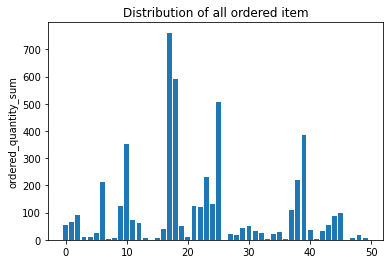

In [18]:
# 주피터노트북에서 그래프를 출력가능하도록 선언
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 아이템별 총수량(item_quantity)의 index를 리스트로 변환한다.
# index는 item_name이다. (위의 2.3 결과 확인)
item_name_list = item_quantity.index.tolist()

# x축 지정: 아이템을 숫자로 표시
# len(item_name_list)은 item_name_list의 길이를 구한다.
# print(len(item_name_list)) # --> 50
# np.arange(50)은 0에서 49까지의 배열 array[0:50]을 생성한다.
x_pos = np.arange(len(item_name_list))

# y축 지정: 총수량 값
# 아이템 별 총 수량(item_quantity)의 values를 리스트로 변환한다.
# values는 총수량 값이다. (위의 2.3 결과 확인)
order_count = item_quantity.values.tolist()

# plt.bar(x축 리스트, y축 리스트, align=위치)으로 막대그래프 객체를 생성한다.
plt.bar(x_pos, order_count, align="center")

# y축 레이블을 지정한다.
plt.ylabel('ordered_quantity_sum')
# 그래프 타이틀을 지정한다.
plt.title('Distribution of all ordered item')
# 그래프를 출력한다.
plt.show()

## <Step3. 데이터 전처리> 전처리 함수 사용하기

**[3.1] apply()와 lambda 함수를 이용한 데이터 전처리하기**

- item_price가 $2.39와 같이 문자열 타입(object)이기 때문에 기초 통계량을 구할 수 없다.

- 수치 데이터로 사용하기 위해서는 $ 기호를 제거해주는 전처리 작업이 필요하다.

In [19]:
chipo['item_price'].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [20]:
# [기초] (lambda x: x+1)은 매개변수 x로 받은 값에 +1을 해주는 람다함수이다.
(lambda x : x+1)(3)

4

In [21]:
# [기초] 매개변수 x로 받은 문자열(문자배열)에서 0번째 ($)를 제외한 나머지를 실수로 변환한다.
(lambda x:float(x[1:]))('$2.39')

2.39

In [22]:
# apply()는 column 단위 데이터에 함수를 적용하여 전처리를 한다.
chipo['item_price'] = chipo['item_price'].apply(lambda x:float(x[1:]))
chipo['item_price'].head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [23]:
# chipo 데이터프레임에서 수치형 피처들의 기초통계량을 확인한다.
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


**[4.1] 주문 당 평균 판매금액 출력하기**

In [24]:
# chipo 데이터프레임에서 상위 10개의 행을 보여준다.
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [25]:
# 주문당 판매금액 출력하기
# 주문번호('order_id')로 그룹핑한 후에 가격('item_price')에 대한 sum()dmf rngksek.
chipo.groupby('order_id')['item_price'].sum()

order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
        ...  
995     24.95
996     43.00
997     22.50
998     10.88
999     29.25
Name: item_price, Length: 1834, dtype: float64

In [26]:
# 주문당 평균 판매금액 출력한다.
# 위의 '주문당 판매금액'을 구한 후에 mean()으로 평균을 구한다
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

In [27]:
# 주문 당 판매금액의 기초 통계량을 구한다.
chipo.groupby('order_id')['item_price'].sum().describe()[:10]

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price, dtype: float64

**[4.2] 한 주문에 100달러 이상 사용한 주문 번호(id) 출력하기**

In [28]:
# 주문번호('order_id')을 그룹핑한 후에 sum()을 하면
# 수치형 데이터 (quantity, item_price) 에 대해 주문번호 당 sum을 하게 된다.
chipo_orderid_group = chipo.groupby('order_id').sum()
print(chipo_orderid_group)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
...            ...         ...
995              3       24.95
996              4       43.00
997              2       22.50
998              2       10.88
999              5       29.25

[1834 rows x 2 columns]


In [29]:
# 주문번호 당 sum을 한 chipo_orderid_group 에서
# item_price가 100 이상인 조건을 준다.
results = chipo_orderid_group[chipo_orderid_group.item_price >= 100]
print(results[:10])

          quantity  item_price
order_id                      
1443            35      160.74
1483            14      139.00
1786            20      114.30
205             12      109.90
491             10      102.00
511             17      104.59
691             11      118.25
926             23      205.25


**[4.3] 각 아이템의 가격 구하기**

In [31]:
# 1) chipo[chipo.quatity == 1]으로 동일 아이템을 1개만 구매한 주문을 선별한다.
chipo_one_item = chipo[chipo.quantity == 1]

# 2) item_name을 기준으로 groupby()을 수행한 뒤, min()으로 각 그룹별 최저가를 구한다.
price_per_item = chipo_one_item.groupby('item_name').min()

# 3) sort_value()을 이용하여 item_price를 기준으로 정렬한다.
# assending = False 은 내림차순 정렬을 의미하며, [:10]으로 10개만 출력한다.
price_per_item.sort_values(by = "item_price", ascending = False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


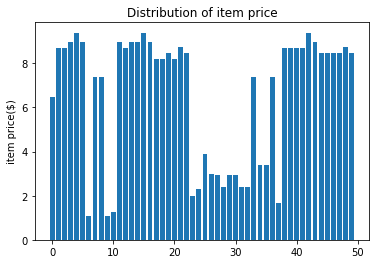

In [33]:
# 아이템 가격 분포 그래프를 출력합니다.
# price_per_item.index는 아이템 이름(item_name)이며 리스트로 변환한다.
item_name_list = price_per_item.index.tolist()

# x_pos는 아이템의 갯수로 배열의 크기로 지정한다. arange(50)
x_pos = np.arange(len(item_name_list))

# y_pos는 아이템 가격을 리스트로 변환한다.
y_pos = price_per_item['item_price'].tolist()

# 막대그래프 객체를 생성한다.
plt.bar(x_pos, y_pos, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
plt.show()

In [36]:
# print_per_item.index 는 아이템 이름(item_name)이다.
print(price_per_item.index.tolist())

['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito', 'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Barbacoa Soft Tacos', 'Bottled Water', 'Bowl', 'Burrito', 'Canned Soda', 'Canned Soft Drink', 'Carnitas Bowl', 'Carnitas Burrito', 'Carnitas Crispy Tacos', 'Carnitas Salad', 'Carnitas Salad Bowl', 'Carnitas Soft Tacos', 'Chicken Bowl', 'Chicken Burrito', 'Chicken Crispy Tacos', 'Chicken Salad', 'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips', 'Chips and Fresh Tomato Salsa', 'Chips and Guacamole', 'Chips and Mild Fresh Tomato Salsa', 'Chips and Roasted Chili Corn Salsa', 'Chips and Roasted Chili-Corn Salsa', 'Chips and Tomatillo Green Chili Salsa', 'Chips and Tomatillo Red Chili Salsa', 'Chips and Tomatillo-Green Chili Salsa', 'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze', 'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bowl', 'Steak Burrito', 'Steak Crispy Tacos', 'Steak Salad', 'Steak Salad Bowl', 'Steak Soft Tacos', 'Veggie Bowl', 'Veggie Burrito', 'Veg